<h2 align="center">Predicting Heart Disease Using Decision Trees, Random Forests And KNN Classification Techniques</h2>

## Step 1: Importing Dataset And Required Libraries

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('heart.csv')

## Step 2: Exploring the dataset

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(303, 14)

In [ ]:
# Exploring first 5 rows of data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Importing more essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\abhyu\AppData\Local\Temp\ipykernel_8692\1840251571.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


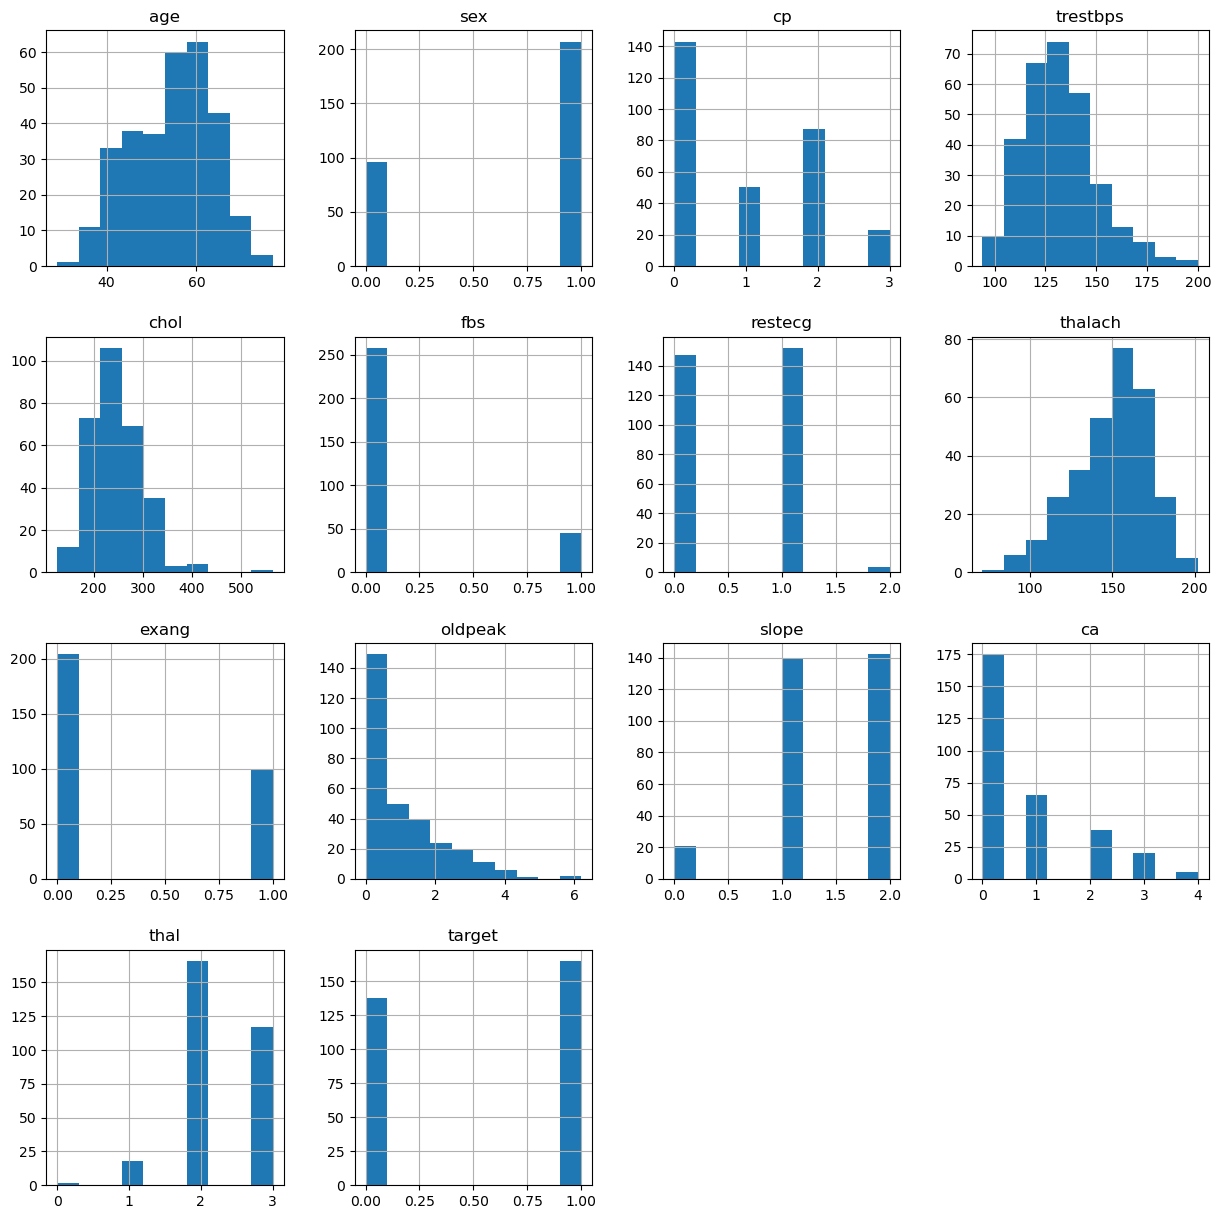

In [12]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

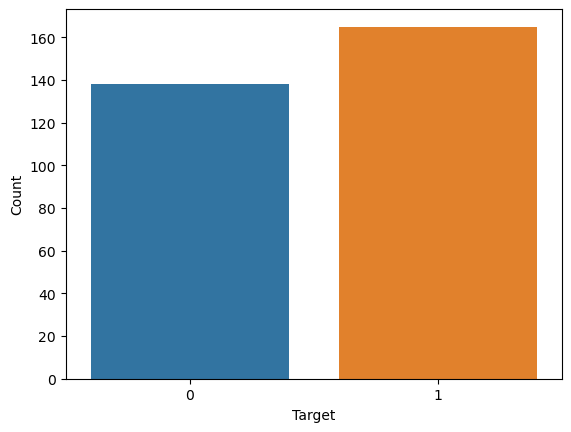

In [13]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

## Step 3: Feature Engineering

<Axes: >

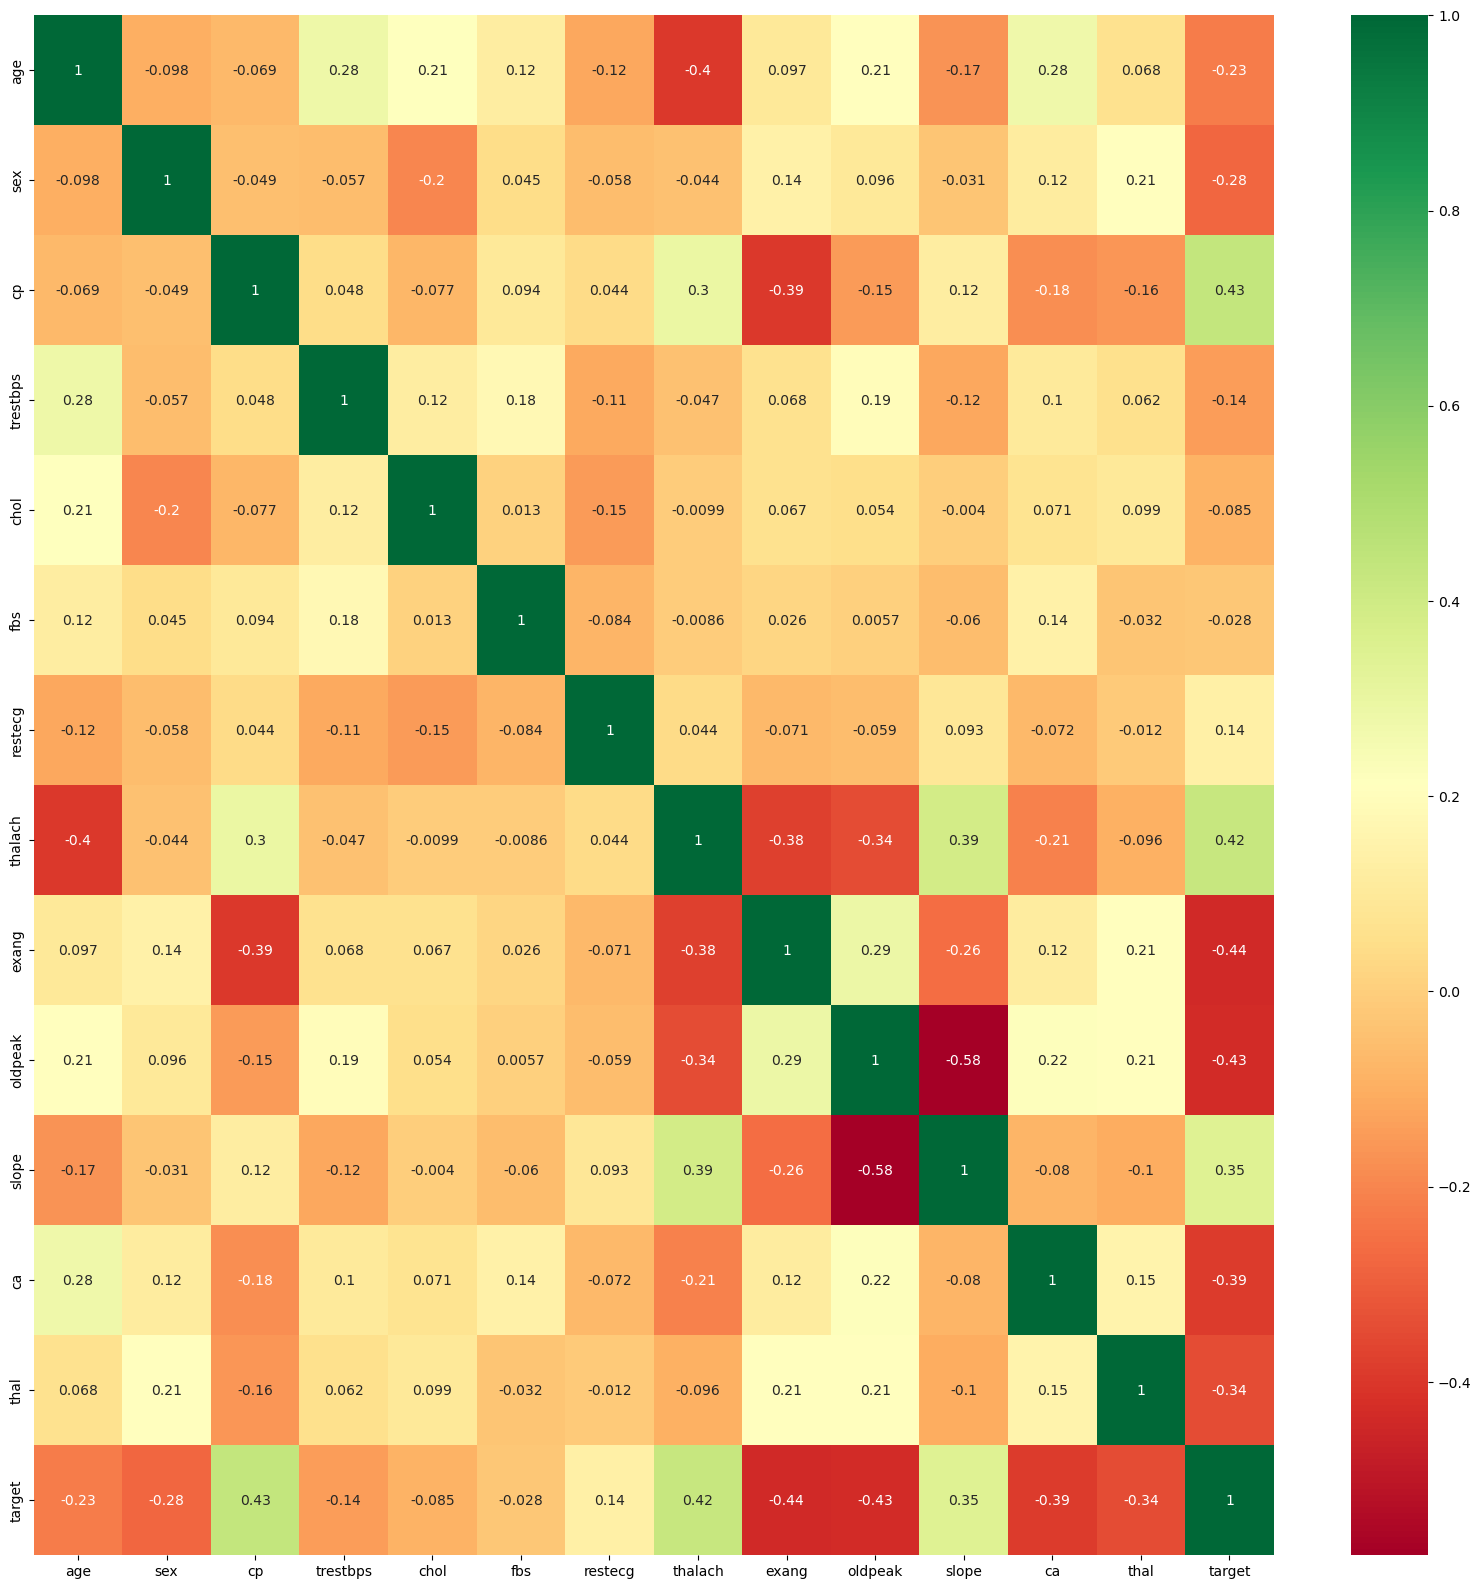

In [14]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

### Handling categorical features

 After exploring the dataset, I converted the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert these features: ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') .

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [15]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### Feature Scaling

In [16]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

## Step 5: Model Building



I will be experimenting with 3 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier

### KNeighbors Classifier Model

In [20]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [21]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

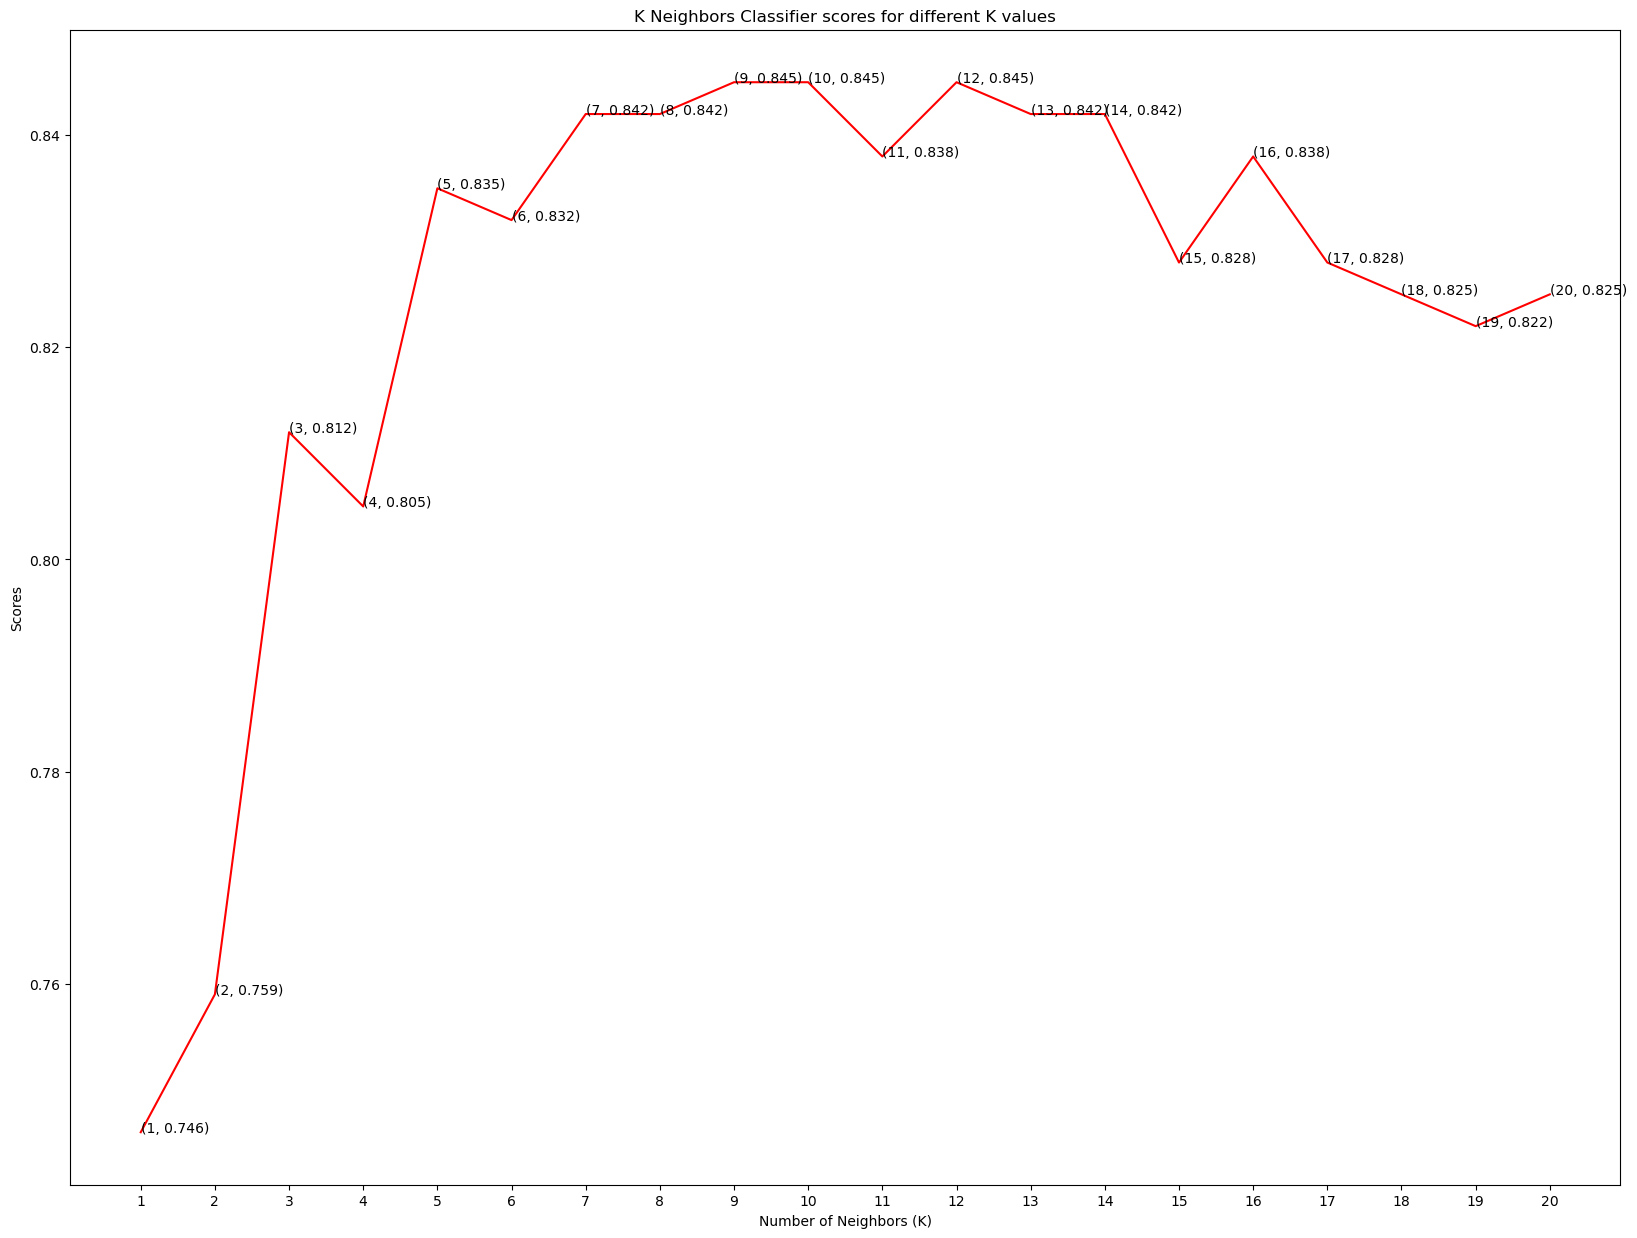

In [22]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [23]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


### Decision Tree Classifier

In [24]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

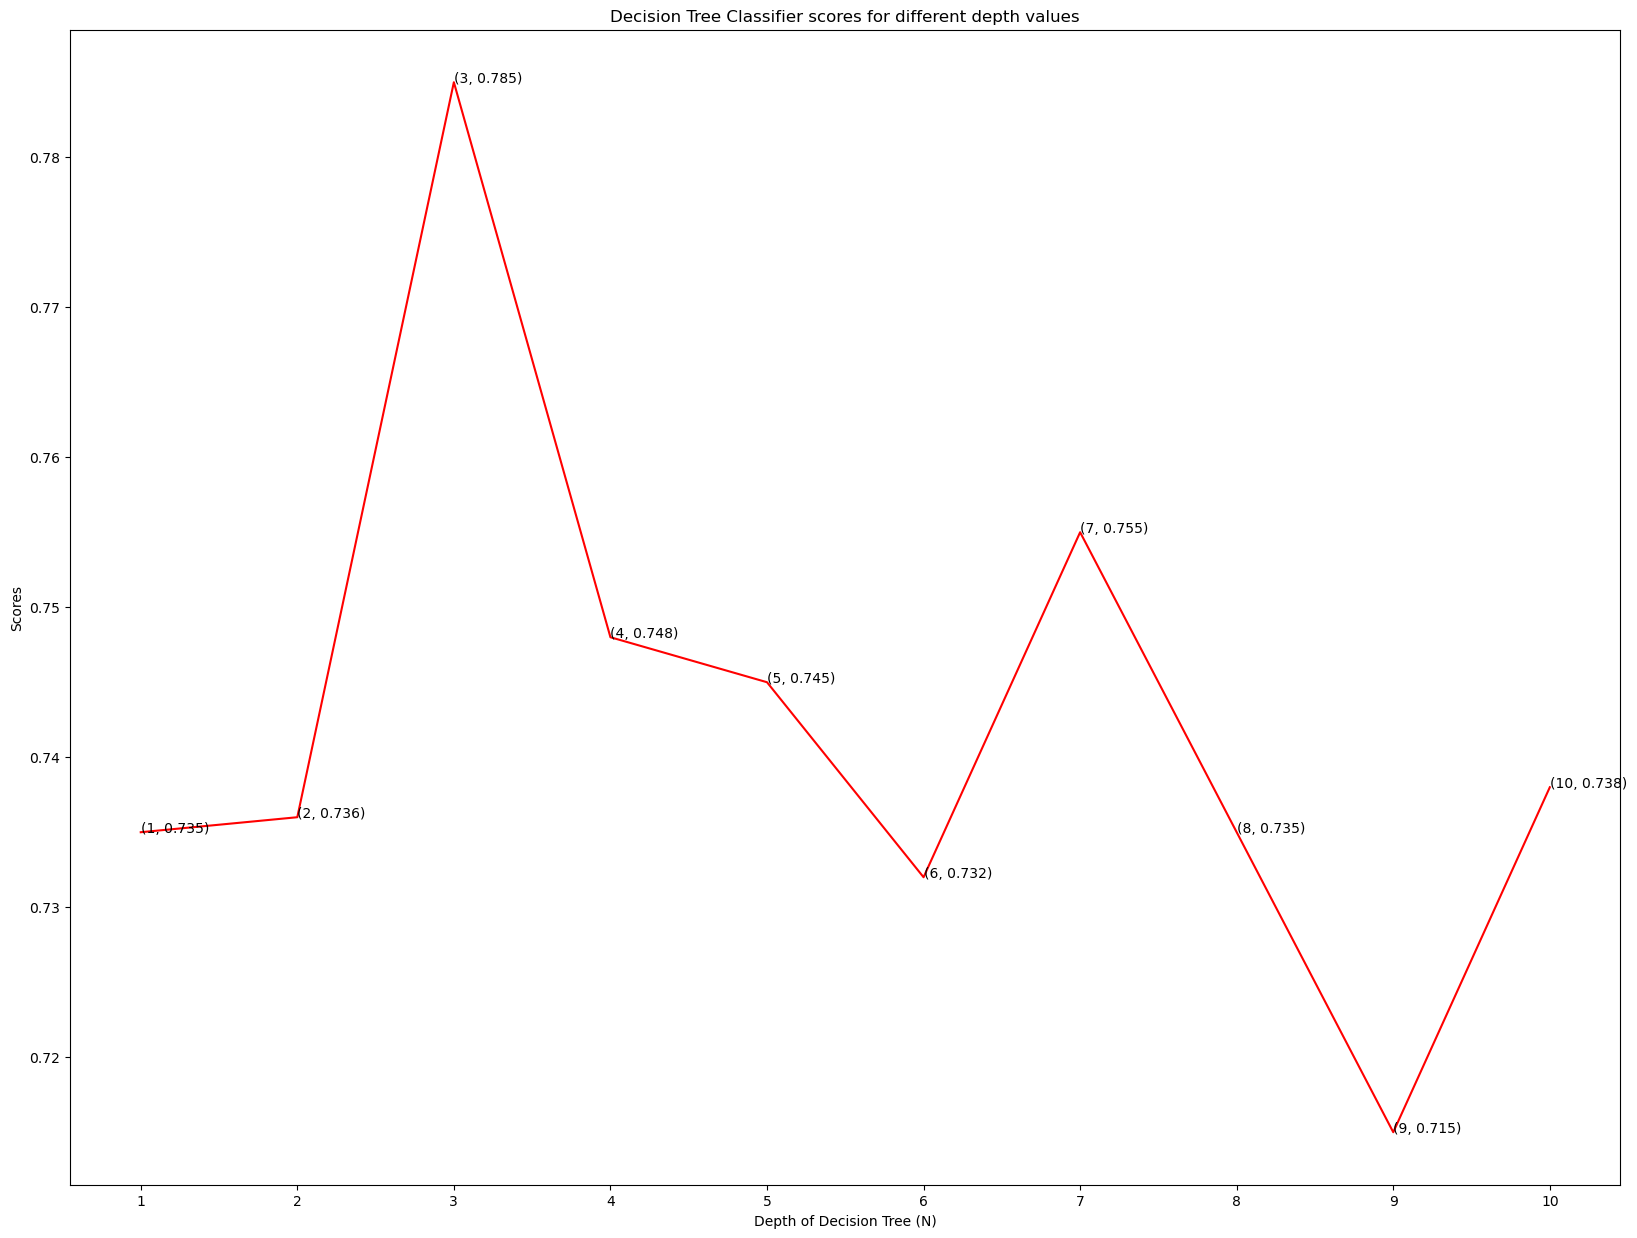

In [27]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [28]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


### Random Forest Classifier

In [29]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

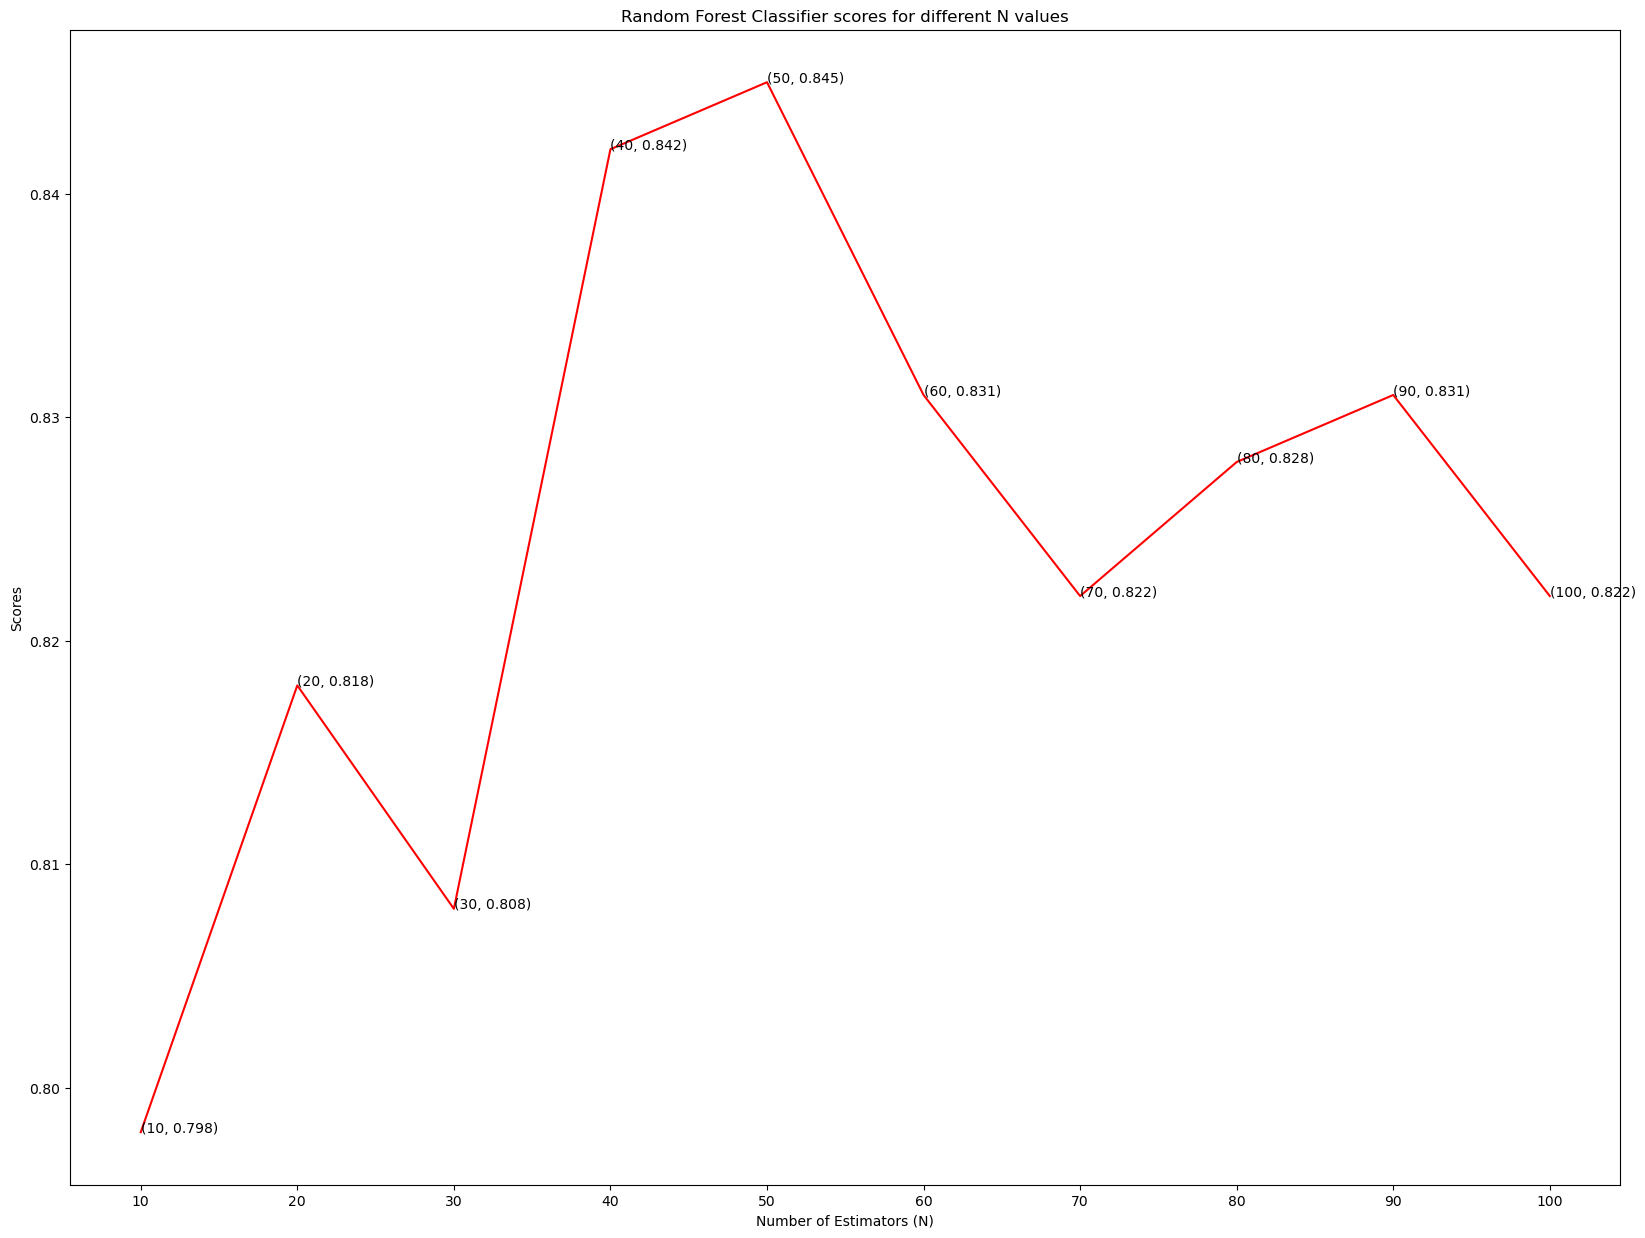

In [31]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [32]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 82.82000000000001%


## Conclusion

 Therefore, it is visible that for the given problem, K Neighbours Classifier Algorithm works the best and provides highest accuracy(84.48%) 